# SDC

#### Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

#### Dataset Importation

In [2]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [3]:
train.head(5)

,TrialID,ObsNum,IsAlert,P1,P2,P3,P4,P5,P6,P7,...,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11
0,0,0,0,34.7406,9.84593,1400,42.8571,0.290601,572,104.895,...,0.175,752,5.99375,0,2005,0,13.4,0,4,14.8004
1,0,1,0,34.4215,13.41120,1400,42.8571,0.290601,572,104.895,...,0.455,752,5.99375,0,2007,0,13.4,0,4,14.7729
2,0,2,0,34.3447,15.18520,1400,42.8571,0.290601,576,104.167,...,0.280,752,5.99375,0,2011,0,13.4,0,4,14.7736
3,0,3,0,34.3421,8.84696,1400,42.8571,0.290601,576,104.167,...,0.070,752,5.99375,0,2015,0,13.4,0,4,14.7667
4,0,4,0,34.3322,14.69940,1400,42.8571,0.290601,576,104.167,...,0.175,752,5.99375,0,2017,0,13.4,0,4,14.7757


In [4]:
summary=train.describe()
summary

,TrialID,ObsNum,IsAlert,P1,P2,P3,P4,P5,P6,P7,...,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11
count,604329.000000,604329.000000,604329.000000,604329.000000,604329.000000,604329.000000,604329.000000,604329.000000,604329.000000,604329.000000,...,604329.000000,604329.000000,604329.000000,604329.000000,604329.000000,604329.0,604329.000000,604329.0,604329.000000,604329.000000
mean,250.167657,603.841765,0.578799,35.449020,11.996525,1026.671035,64.061965,0.178923,845.384610,77.887628,...,-0.037710,573.786433,19.961030,0.179814,1715.688383,0.0,12.710354,0.0,3.312257,11.668277
std,145.446164,348.931601,0.493752,7.484629,3.760292,309.277877,19.755950,0.372309,2505.335141,18.577930,...,0.403896,298.412888,63.269456,0.384033,618.176470,0.0,11.532085,0.0,1.243586,9.934423
min,0.000000,0.000000,0.000000,-22.481200,-45.629200,504.000000,23.885300,0.038920,128.000000,0.262224,...,-4.795000,240.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,1.000000,1.676730
25%,125.000000,302.000000,0.000000,31.758100,9.903540,792.000000,49.180300,0.092110,668.000000,66.666700,...,-0.175000,255.000000,1.487500,0.000000,1259.000000,0.0,0.000000,0.0,3.000000,7.947680
50%,250.000000,604.000000,1.000000,34.145100,11.400400,1000.000000,60.000000,0.105083,800.000000,75.000000,...,0.000000,511.000000,3.018750,0.000000,1994.000000,0.0,12.800000,0.0,4.000000,10.772600
75%,374.000000,906.000000,1.000000,37.311900,13.644200,1220.000000,75.757600,0.138814,900.000000,89.820400,...,0.070000,767.000000,7.481250,0.000000,2146.000000,0.0,21.900000,0.0,4.000000,15.270900
max,510.000000,1210.000000,1.000000,101.351000,71.173700,2512.000000,119.048000,27.202200,228812.000000,468.750000,...,3.990000,1023.000000,484.488000,1.000000,4892.000000,0.0,82.100000,0.0,7.000000,262.534000


#### Imputation of Missing value

In [5]:
train.isnull().sum()

TrialID    0
ObsNum     0
IsAlert    0
P1         0
P2         0
P3         0
P4         0
P5         0
P6         0
P7         0
P8         0
E1         0
E2         0
E3         0
E4         0
E5         0
E6         0
E7         0
E8         0
E9         0
E10        0
E11        0
V1         0
V2         0
V3         0
V4         0
V5         0
V6         0
V7         0
V8         0
V9         0
V10        0
V11        0
dtype: int64

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 604329 entries, 0 to 604328
Data columns (total 33 columns):
TrialID    604329 non-null int64
ObsNum     604329 non-null int64
IsAlert    604329 non-null int64
P1         604329 non-null float64
P2         604329 non-null float64
P3         604329 non-null int64
P4         604329 non-null float64
P5         604329 non-null float64
P6         604329 non-null int64
P7         604329 non-null float64
P8         604329 non-null int64
E1         604329 non-null float64
E2         604329 non-null float64
E3         604329 non-null int64
E4         604329 non-null int64
E5         604329 non-null float64
E6         604329 non-null int64
E7         604329 non-null int64
E8         604329 non-null int64
E9         604329 non-null int64
E10        604329 non-null int64
E11        604329 non-null float64
V1         604329 non-null float64
V2         604329 non-null float64
V3         604329 non-null int64
V4         604329 non-null float64
V5     

#### Uni-Variate Analysis

C:\Users\daniel\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\daniel\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


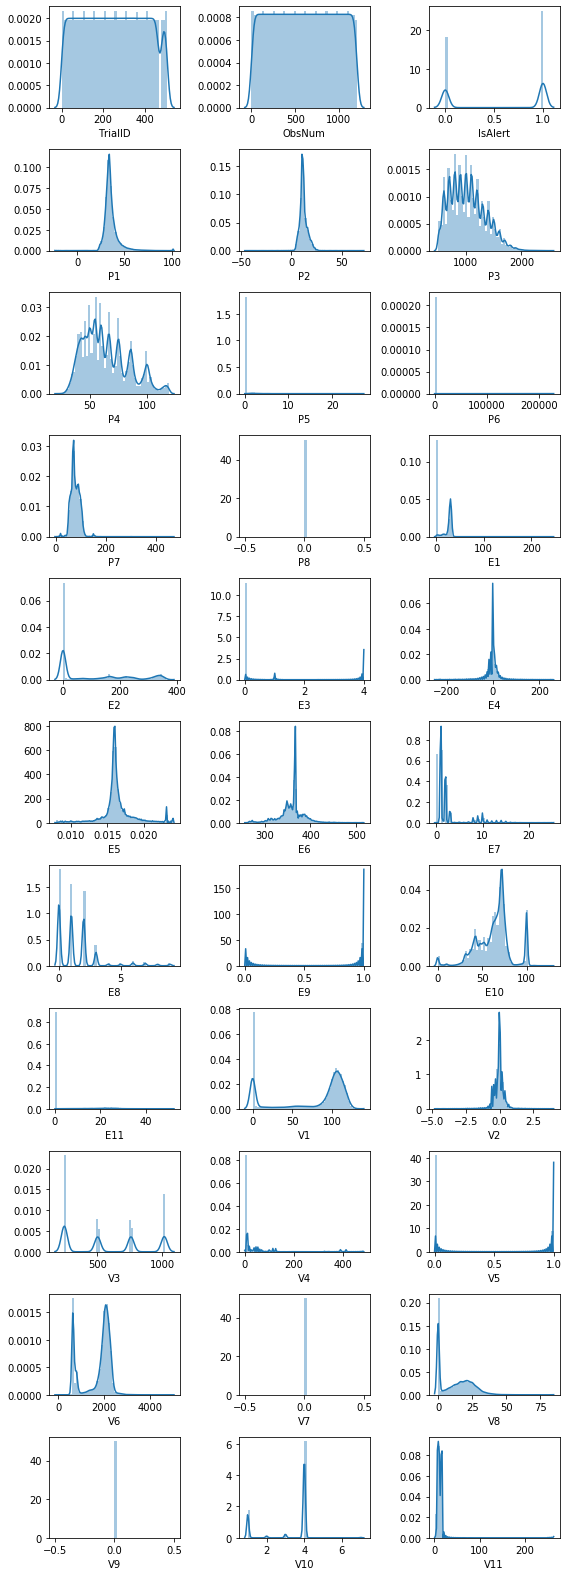

In [7]:
num_column=train.select_dtypes(include=['int64','float64']).columns
plt.figure(figsize=(8,22))
i=1
for c in num_column:
    plt.subplot(11,3,i)
    sns.distplot(train[c])
    i+=1
    
plt.tight_layout()
plt.show()

In [8]:
train=train.drop(['P8','V7','V9'],axis=1)

In [9]:
train.columns

Index(['TrialID', 'ObsNum', 'IsAlert', 'P1', 'P2', 'P3', 'P4', 'P5', 'P6',
       'P7', 'E1', 'E2', 'E3', 'E4', 'E5', 'E6', 'E7', 'E8', 'E9', 'E10',
       'E11', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V8', 'V10', 'V11'],
      dtype='object')

#### Bi-Variate Analysis

In [10]:
correlation=train.corr()
correlation

,TrialID,ObsNum,IsAlert,P1,P2,P3,P4,P5,P6,P7,...,E11,V1,V2,V3,V4,V5,V6,V8,V10,V11
TrialID,1.000000,-0.000162,-0.145816,0.016772,-0.004473,0.000369,0.001880,0.022632,0.005377,0.111903,...,0.073676,-0.117728,0.065063,0.001900,-0.074320,0.123721,-0.097389,-0.047593,-0.093818,0.078887
ObsNum,-0.000162,1.000000,-0.005143,0.018324,-0.001764,0.002199,-0.001191,0.005568,-0.015791,0.003498,...,0.004978,0.004242,0.019009,0.007753,-0.000480,-0.006284,0.003935,0.008191,0.005145,-0.011465
IsAlert,-0.145816,-0.005143,1.000000,0.018361,0.014383,0.005168,-0.008177,0.038160,-0.000400,0.189796,...,0.079002,-0.269967,-0.050740,-0.062000,0.097022,0.055429,-0.244150,-0.165550,-0.259607,0.155722
P1,0.016772,0.018324,0.018361,1.000000,-0.006674,-0.010317,0.011704,0.010911,0.045429,0.027461,...,0.015882,-0.025763,-0.021118,0.002551,0.021404,0.051348,-0.019792,-0.029747,-0.004563,0.344636
P2,-0.004473,-0.001764,0.014383,-0.006674,1.000000,-0.002539,0.002132,0.008390,-0.022003,0.052171,...,0.001857,0.011310,0.001779,0.002272,-0.006038,-0.023902,0.010608,0.008257,0.001946,-0.034248
P3,0.000369,0.002199,0.005168,-0.010317,-0.002539,1.000000,-0.944435,0.035129,0.012444,-0.006097,...,0.007423,-0.011347,0.008651,-0.006380,0.013045,0.001312,-0.010245,-0.007963,-0.009630,-0.009808
P4,0.001880,-0.001191,-0.008177,0.011704,0.002132,-0.944435,1.000000,-0.032897,-0.010627,0.007323,...,-0.005681,0.010061,-0.006926,0.008049,-0.010905,0.001705,0.008348,0.005379,0.008906,0.009841
P5,0.022632,0.005568,0.038160,0.010911,0.008390,0.035129,-0.032897,1.000000,0.002314,-0.023628,...,0.028216,-0.054428,0.026232,0.005371,0.070290,-0.016671,-0.046353,-0.023359,-0.022193,-0.004897
P6,0.005377,-0.015791,-0.000400,0.045429,-0.022003,0.012444,-0.010627,0.002314,1.000000,-0.125580,...,-0.008939,-0.024449,-0.010418,-0.004996,0.019121,0.029222,-0.025728,-0.016850,-0.002163,0.012783
P7,0.111903,0.003498,0.189796,0.027461,0.052171,-0.006097,0.007323,-0.023628,-0.125580,1.000000,...,0.084846,-0.043512,0.025850,0.007986,0.037711,0.024499,-0.020696,-0.008450,-0.041814,0.019360


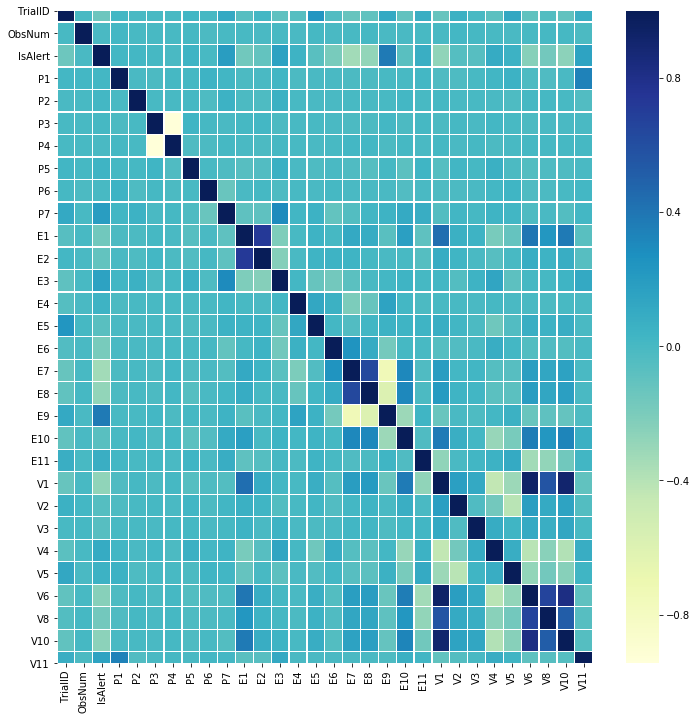

In [11]:
plt.figure(figsize=(12,12))
sns.heatmap(correlation,linewidths=0.2,cmap="YlGnBu")

#### X and Y Split

In [12]:
Y=train['IsAlert']
X=train.drop('IsAlert',axis=1)

In [13]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=123)

#### Feature Engineering

In [14]:
scaler=StandardScaler()

In [15]:
scaled_x_train=scaler.fit_transform(x_train)
scaled_x_test=scaler.fit_transform(x_test)

In [16]:
x_train=pd.DataFrame(scaled_x_train,columns=x_train.columns)
x_test=pd.DataFrame(scaled_x_test,columns=x_test.columns)

#### Model Building

In [17]:
logistic=LogisticRegression()
decision=DecisionTreeClassifier()
random=RandomForestClassifier()

In [18]:
model_lr=logistic.fit(x_train,y_train)
model_dt=decision.fit(x_train,y_train)
model_rf=random.fit(x_train,y_train)

#### Prediction of X and Y

In [19]:
logistic_train=model_lr.predict(x_train)
logistic_test=model_lr.predict(x_test)

decision_train=model_dt.predict(x_train)
decision_test=model_dt.predict(x_test)

random_train=model_rf.predict(x_train)
random_test=model_rf.predict(x_test)

#x_train_svc=model_svc=predict(x_train)
#x_test_svc=model_svc=predict(x_test)

#### Accuracy

In [20]:
accuracy_train=accuracy_score(y_train,logistic_train)
accuracy_test=accuracy_score(y_test,logistic_test)

accuracy_train_dt=accuracy_score(y_train,decision_train)
accuracy_test_dt=accuracy_score(y_test,decision_test)

accuracy_train_rf=accuracy_score(y_train,random_train)
accuracy_test_rf=accuracy_score(y_test,random_test)

print('Logistic Regression Accuracy')
print('train',accuracy_train)
print('test',accuracy_test)

print('Decision Tree Accuracy')
print('train',accuracy_train_dt)
print('test',accuracy_test_dt)

print('Random Forest Accuracy')
print('train',accuracy_train_rf)
print('test',accuracy_test_rf)

Logistic Regression Accuracy
train 0.8217133472468421
test 0.8222411596313273
Decision Tree Accuracy
train 1.0
test 0.9845696887462149
Random Forest Accuracy
train 1.0
test 0.9931494382208396


#### Confusion Matrix

In [21]:
cm_train=confusion_matrix(y_train,logistic_train)
cm_test=confusion_matrix(y_test,logistic_test)

cm_train_dt=confusion_matrix(y_train,decision_train)
cm_test_dt=confusion_matrix(y_test,decision_test)

cm_train_rf=confusion_matrix(y_train,random_train)
cm_test_rf=confusion_matrix(y_test,random_test)

print('Logistic Regression Confusion Matrix')
print('train',cm_train)
print('test',cm_test)

print('Decision Tree Confusion Matrix')
print('train',cm_train_dt)
print('test',cm_test_dt)

print('Random Forest Confusion Matrix')
print('train',cm_train_rf)
print('test',cm_test_rf)

Logistic Regression Confusion Matrix
train [[148019  55308]
 [ 30887 249249]]
test [[37134 14083]
 [ 7402 62247]]
Decision Tree Confusion Matrix
train [[203327      0]
 [     0 280136]]
test [[50310   907]
 [  958 68691]]
Random Forest Confusion Matrix
train [[203327      0]
 [     0 280136]]
test [[50471   746]
 [   82 69567]]


#### F1_Score

In [22]:
f1_train=f1_score(y_train,logistic_train)
f1_test=f1_score(y_test,logistic_test)

f1_train_dt=f1_score(y_train,decision_train)
f1_test_dt=f1_score(y_test,decision_test)

f1_train_rf=f1_score(y_train,random_train)
f1_test_rf=f1_score(y_test,random_test)

print('Logistic Regression F1_Score')
print('train',f1_train)
print('test',f1_test)

print('Decision Tree F1_score')
print('train',f1_train_dt)
print('test',f1_test_dt)

print('Random Forest F1_Score')
print('train',f1_train_rf)
print('test',f1_test_rf)

Logistic Regression F1_Score
train 0.8525807560548868
test 0.852821296213839
Decision Tree F1_score
train 1.0
test 0.9866065337134732
Random Forest F1_Score
train 1.0
test 0.9940841085437475


#### Test DataSet

In [23]:
test.head(5)

,TrialID,ObsNum,IsAlert,P1,P2,P3,P4,P5,P6,P7,...,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11
0,0,0,?,38.4294,10.9435,1000,60.0,0.302277,508,118.110,...,0.00,255,4.50625,0,2127,0,17.6,0,4,16.1937
1,0,1,?,38.3609,15.3212,1000,60.0,0.302277,508,118.110,...,0.00,255,4.50625,0,2127,0,17.6,0,4,16.1744
2,0,2,?,38.2342,11.5140,1000,60.0,0.302277,508,118.110,...,0.07,255,4.50625,0,2131,0,17.6,0,4,16.1602
3,0,3,?,37.9304,12.2615,1000,60.0,0.302277,508,118.110,...,0.07,255,4.50625,0,2131,0,17.6,0,4,16.1725
4,0,4,?,37.8085,12.3666,1000,60.0,0.302277,504,119.048,...,0.00,255,4.50625,0,2136,0,17.6,0,4,16.1459


In [24]:
test=test.drop(['IsAlert','P8','V7','V9'],axis=1)

In [25]:
scaled_test=scaler.fit_transform(test)
test=pd.DataFrame(scaled_test,columns=test.columns)

In [26]:
logistic_test=logistic.predict(test)
decision_test=decision.predict(test)
random_test=random.predict(test)

In [27]:
submission1=pd.read_csv('submission.csv')
submission2=pd.read_csv('submission.csv')
submission3=pd.read_csv('submission.csv')

In [28]:
submission1.head(2)

,TrialID,ObsNum,Prediction
0,0,0,0
1,0,1,0


In [29]:
submission1['Prediction']=logistic_test
submission2['Prediction']=decision_test
submission3['Prediction']=random_test

In [30]:
solution1=pd.read_csv('Solution.csv')
solution2=pd.read_csv('Solution.csv')
solution3=pd.read_csv('Solution.csv')

In [31]:
cm_final_logistic=confusion_matrix(submission1['Prediction'],solution1['Prediction'])
cm_final_decision=confusion_matrix(submission2['Prediction'],solution2['Prediction'])
cm_final_random=confusion_matrix(submission3['Prediction'],solution3['Prediction'])

In [32]:
f1_final_logistic=f1_score(submission1['Prediction'],solution1['Prediction'])
f1_final_decision=f1_score(submission2['Prediction'],solution2['Prediction'])
f1_final_random=f1_score(submission3['Prediction'],solution3['Prediction'])

print('Logistic_Regression',f1_final_logistic)
print('Decision_Tree',f1_final_decision)
print('Random_Forest',f1_final_random)

Logistic_Regression 0.6682492026024915
Decision_Tree 0.7650440115708841
Random_Forest 0.7687929610684346


In [33]:
accuracy_logistic=accuracy_score(submission1['Prediction'],solution1['Prediction'])
accuracy_decision=accuracy_score(submission2['Prediction'],solution2['Prediction'])
accuracy_random=accuracy_score(submission3['Prediction'],solution3['Prediction'])

print('Logistic_Regression',accuracy_logistic)
print('Decision_Tree',accuracy_decision)
print('Random_Forest',accuracy_random )

Logistic_Regression 0.589432307183052
Decision_Tree 0.6867759020191989
Random_Forest 0.6779460443561734
